## Download the pretrained models

In [2]:
import pandas as pd
import urllib.request
import os
os.environ["HDF5_USE_FILE_LOCKING"]='FALSE'
import sys
import h5py
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

def main():
    model_info = pd.read_csv('/content/drive/MyDrive/neurips-2020-sevir-master/models/model_urls.csv')
    for i,r in model_info.iterrows():
        print(f'Downloading {r.model}...')
        download_file(r.url,f'{r.application}/{r.model}')

def download_file(url,filename):
    print(f'wget {url}')
    os.system(f'wget {url}')

if __name__=='__main__':
    main()

wget https://www.dropbox.com/s/d1e2p36nu4sqq7m/gan_mae_weights.h5?dl=0
wget https://www.dropbox.com/s/a39ig25nxkrmbkx/mse_vgg_weights.h5?dl=0
wget https://www.dropbox.com/s/6cqtrv2yliwcyh5/mse_weights.h5?dl=0
wget https://www.dropbox.com/s/9y3m4axfc3ox9i7/gan_generator.h5?dl=0
wget https://www.dropbox.com/s/lqpro9dks5rykxk/mse_and_style.h5?dl=0
wget https://www.dropbox.com/s/yrfx3t3nckaofqu/style_model.h5?dl=0
wget https://www.dropbox.com/s/95vmmlci5x3acar/mse_model.h5?dl=0


## Download specific files to generate Testing Data.

In [1]:
!pip install boto3

In [2]:
import boto3
import h5py
import pandas as pd
from botocore.handlers import disable_signing

In [3]:
resource = boto3.resource('s3')
resource.meta.client.meta.events.register('choose-signer.s3.*', disable_signing)
bucket=resource.Bucket('sevir')
objs=bucket.objects.filter(Prefix='')
for o in objs:
     if o.key == '/data/vil/2019/SEVIR_VIL_STORMEVENTS_2019_0101_0630.h5':
         print(o.key)

In [5]:
satellite = pd.read_csv("/content/drive/MyDrive/CATALOG.csv")
files = list(satellite[satellite.event_id == 781628].file_name)
event_subset = satellite.loc[satellite['event_id'].isin([781628])]
#event_subset = event_subset.loc[~event_subset['img_type'].isin(['vis'])]
event_subset

event_subset.to_csv('/content/event_subset.csv')

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: DtypeWarning: Columns (5) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [6]:
!ls

 drive			   'mse_and_style.h5?dl=0'     sample_data
 event_subset.csv	   'mse_model.h5?dl=0'	      'style_model.h5?dl=0'
'gan_generator.h5?dl=0'    'mse_vgg_weights.h5?dl=0'
'gan_mae_weights.h5?dl=0'  'mse_weights.h5?dl=0'


In [7]:
satellite = pd.read_csv("/content/drive/MyDrive/CATALOG.csv")

#files = list(satellite.loc[satellite['file_name'].isin([2018_0801_0831])])
print(files)

['vis/2018/SEVIR_VIS_STORMEVENTS_2018_0801_0831.h5', 'vil/2018/SEVIR_VIL_STORMEVENTS_2018_0701_1231.h5', 'ir107/2018/SEVIR_IR107_STORMEVENTS_2018_0701_1231.h5', 'ir069/2018/SEVIR_IR069_STORMEVENTS_2018_0701_1231.h5', 'lght/2018/SEVIR_LGHT_ALLEVENTS_2018_0801_0901.h5']


/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: DtypeWarning: Columns (5) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [8]:
for file in files:
    key = 'data/' + file
    print(key)
    filename = file.split('/')
    bucket.download_file(key,filename[2])

data/vis/2018/SEVIR_VIS_STORMEVENTS_2018_0801_0831.h5
data/vil/2018/SEVIR_VIL_STORMEVENTS_2018_0701_1231.h5
data/ir107/2018/SEVIR_IR107_STORMEVENTS_2018_0701_1231.h5
data/ir069/2018/SEVIR_IR069_STORMEVENTS_2018_0701_1231.h5
data/lght/2018/SEVIR_LGHT_ALLEVENTS_2018_0801_0901.h5


In [9]:
!mv SEVIR_VIL_STORMEVENTS_2018_0701_1231.h5 /content/sample_data/vil/2018
!mv SEVIR_IR069_STORMEVENTS_2018_0701_1231.h5 /content/sample_data/ir069/2018
!mv SEVIR_IR107_STORMEVENTS_2018_0701_1231.h5 /content/sample_data/ir107/2018
!mv SEVIR_LGHT_ALLEVENTS_2018_0801_0901.h5 /content/sample_data/lght/2018
!mv SEVIR_VIS_STORMEVENTS_2018_0801_0831.h5 /content/sample_data/vis/2018

## Generate the Data and store it in h5 File.

In [13]:
!python /content/make_nowcast_dataset.py --sevir_data /content/sample_data/ --sevir_catalog /content/drive/MyDrive/Cat.csv --output_location /content/drive/MyDrive/Output_Nowcast

/usr/local/lib/python3.7/dist-packages/requests/__init__.py:91: RequestsDependencyWarning: urllib3 (1.26.8) or chardet (3.0.4) doesn't match a supported version!
  RequestsDependencyWarning)
2022-02-24 19:53:03,686 - __main__ - INFO - making final data set from raw data
2022-02-24 19:53:07,580 - __main__ - INFO - Reading/writing training data to /content/drive/MyDrive/Output_Nowcast/nowcast_training.h5
2022-02-24 19:53:07,581 - __main__ - INFO - Gathering chunk 0/20:
100% 5/5 [00:03<00:00,  1.32it/s]
2022-02-24 19:53:15,404 - __main__ - INFO - Gathering chunk 1/20:
100% 5/5 [00:03<00:00,  1.61it/s]
2022-02-24 19:53:22,461 - __main__ - INFO - Gathering chunk 2/20:
100% 5/5 [00:02<00:00,  1.84it/s]
2022-02-24 19:53:29,319 - __main__ - INFO - Gathering chunk 3/20:
100% 5/5 [00:02<00:00,  1.83it/s]
2022-02-24 19:53:36,836 - __main__ - INFO - Gathering chunk 4/20:
100% 5/5 [00:02<00:00,  1.81it/s]
2022-02-24 19:53:43,714 - __main__ - INFO - Gathering chunk 5/20:
100% 5/5 [00:03<00:00,  1.57

In [14]:
import os
os.environ["HDF5_USE_FILE_LOCKING"]='FALSE'
import sys
#sys.path.append('../src/')
import h5py
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib.colors import ListedColormap
from matplotlib.patches import Patch
from matplotlib.lines import Line2D
import matplotlib.patches as patches
import pandas as pd
from display import get_cmap

/usr/local/lib/python3.7/dist-packages/requests/__init__.py:91: RequestsDependencyWarning: urllib3 (1.26.8) or chardet (3.0.4) doesn't match a supported version!
  RequestsDependencyWarning)


## Load pretrained models

In [15]:
# Load pretrained nowcasting models
mse_file  = '/content/mse_model.h5?dl=0'   #Give the path where the file is located in your systems.
mse_model = tf.keras.models.load_model(mse_file,compile=False,custom_objects={"tf": tf})

style_file = '/content/style_model.h5?dl=0'
style_model = tf.keras.models.load_model(style_file,compile=False,custom_objects={"tf": tf})

mse_style_file = '/content/mse_and_style.h5?dl=0'
mse_style_model = tf.keras.models.load_model(mse_style_file,compile=False,custom_objects={"tf": tf})

gan_file = '/content/gan_generator.h5?dl=0'
gan_model = tf.keras.models.load_model(gan_file,compile=False,custom_objects={"tf": tf})

## Load sample test data


In [16]:
# Load a part of the test dataset
from nowcast_reader import read_data
x_test,y_test = read_data('/content/drive/MyDrive/Output_Nowcast/nowcast_testing.h5',end=50)  #Give the path where the file is located in your systems.

## Plot samples for test set

In [17]:
## 
# Functions for plotting results
##

norm = {'scale':47.54,'shift':33.44}
hmf_colors = np.array( [
    [82,82,82], 
    [252,141,89],
    [255,255,191],
    [145,191,219]
])/255

# Model that implements persistence forecast that just repeasts last frame of input
class persistence:
    def predict(self,x_test):
        return np.tile(x_test[:,:,:,-1:],[1,1,1,12])

def plot_hit_miss_fa(ax,y_true,y_pred,thres):
    mask = np.zeros_like(y_true)
    mask[np.logical_and(y_true>=thres,y_pred>=thres)]=4
    mask[np.logical_and(y_true>=thres,y_pred<thres)]=3
    mask[np.logical_and(y_true<thres,y_pred>=thres)]=2
    mask[np.logical_and(y_true<thres,y_pred<thres)]=1
    cmap=ListedColormap(hmf_colors)
    ax.imshow(mask,cmap=cmap)


def visualize_result(models,x_test,y_test,idx,ax,labels):
    fs=10
    cmap_dict = lambda s: {'cmap':get_cmap(s,encoded=True)[0],
                           'norm':get_cmap(s,encoded=True)[1],
                           'vmin':get_cmap(s,encoded=True)[2],
                           'vmax':get_cmap(s,encoded=True)[3]}
    for i in range(1,13,3):
        xt = x_test[idx,:,:,i]*norm['scale']+norm['shift']
        ax[(i-1)//3][0].imshow(xt,**cmap_dict('vil'))
    ax[0][0].set_title('Inputs',fontsize=fs)
    
    pers = persistence().predict(x_test[idx:idx+1])
    pers = pers*norm['scale']+norm['shift']
    x_test = x_test[idx:idx+1]
    y_test = y_test[idx:idx+1]*norm['scale']+norm['shift']
    y_preds=[]
    for i,m in enumerate(models):
        yp = m.predict(x_test)
        if isinstance(yp,(list,)):
            yp=yp[0]
        y_preds.append(yp*norm['scale']+norm['shift'])
    
    for i in range(0,12,3):
        ax[i//3][2].imshow(y_test[0,:,:,i],**cmap_dict('vil'))
    ax[0][2].set_title('Target',fontsize=fs)
    
    # Plot Persistence
    for i in range(0,12,3):
        plot_hit_miss_fa(ax[i//3][4],y_test[0,:,:,i],pers[0,:,:,i],74)
    ax[0][4].set_title('Persistence\nScores',fontsize=fs)
    
    for k,m in enumerate(models):
        for i in range(0,12,3):
            ax[i//3][5+2*k].imshow(y_preds[k][0,:,:,i],**cmap_dict('vil'))
            plot_hit_miss_fa(ax[i//3][5+2*k+1],y_test[0,:,:,i],y_preds[k][0,:,:,i],74)

        ax[0][5+2*k].set_title(labels[k],fontsize=fs)
        ax[0][5+2*k+1].set_title(labels[k]+'\nScores',fontsize=fs)
        
    for j in range(len(ax)):
        for i in range(len(ax[j])):
            ax[j][i].xaxis.set_ticks([])
            ax[j][i].yaxis.set_ticks([])
    for i in range(4):
        ax[i][1].set_visible(False)
    for i in range(4):
        ax[i][3].set_visible(False)
    ax[0][0].set_ylabel('-45 Minutes')
    ax[1][0].set_ylabel('-30 Minutes')
    ax[2][0].set_ylabel('-15 Minutes')
    ax[3][0].set_ylabel('  0 Minutes')
    ax[0][2].set_ylabel('+15 Minutes')
    ax[1][2].set_ylabel('+30 Minutes')
    ax[2][2].set_ylabel('+45 Minutes')
    ax[3][2].set_ylabel('+60 Minutes')
    
    legend_elements = [Patch(facecolor=hmf_colors[1], edgecolor='k', label='False Alarm'),
                   Patch(facecolor=hmf_colors[2], edgecolor='k', label='Miss'),
                   Patch(facecolor=hmf_colors[3], edgecolor='k', label='Hit')]
    ax[-1][-1].legend(handles=legend_elements, loc='lower right', bbox_to_anchor= (-5.4, -.35), 
                           ncol=5, borderaxespad=0, frameon=False, fontsize='16')
    plt.subplots_adjust(hspace=0.05, wspace=0.05)
    

### Plot a few test cases

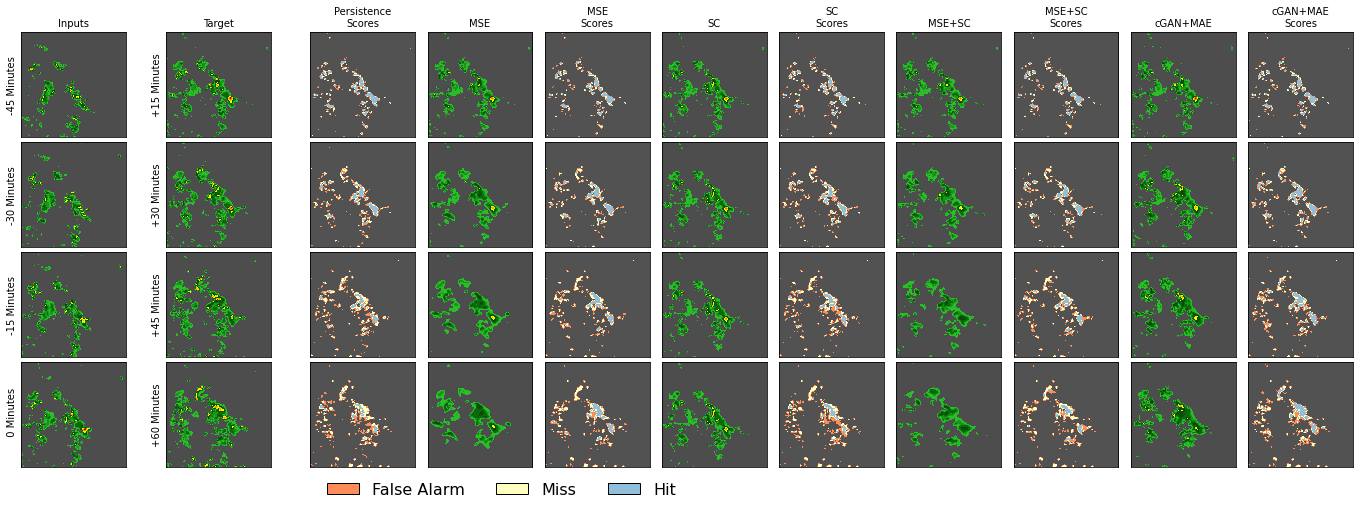

In [18]:
idx=25 # adjust this to pick a case
fig,ax = plt.subplots(4,13,figsize=(24,8), gridspec_kw={'width_ratios': [1,.2,1,.2,1,1,1,1,1,1,1,1,1]})
visualize_result([mse_model,style_model,mse_style_model,gan_model],x_test,y_test,idx,ax,labels=['MSE','SC','MSE+SC','cGAN+MAE'])

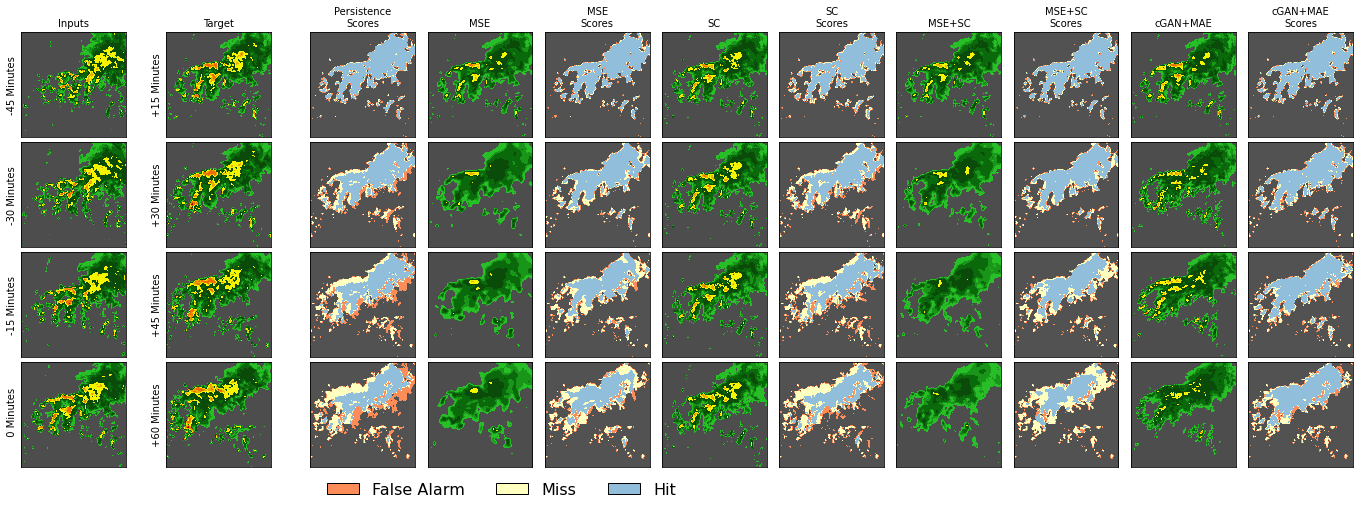

In [19]:
idx=45 # adjust this to pick a case
fig,ax = plt.subplots(4,13,figsize=(24,8), gridspec_kw={'width_ratios': [1,.2,1,.2,1,1,1,1,1,1,1,1,1]})
visualize_result([mse_model,style_model,mse_style_model,gan_model],x_test,y_test,idx,ax,labels=['MSE','SC','MSE+SC','cGAN+MAE'])

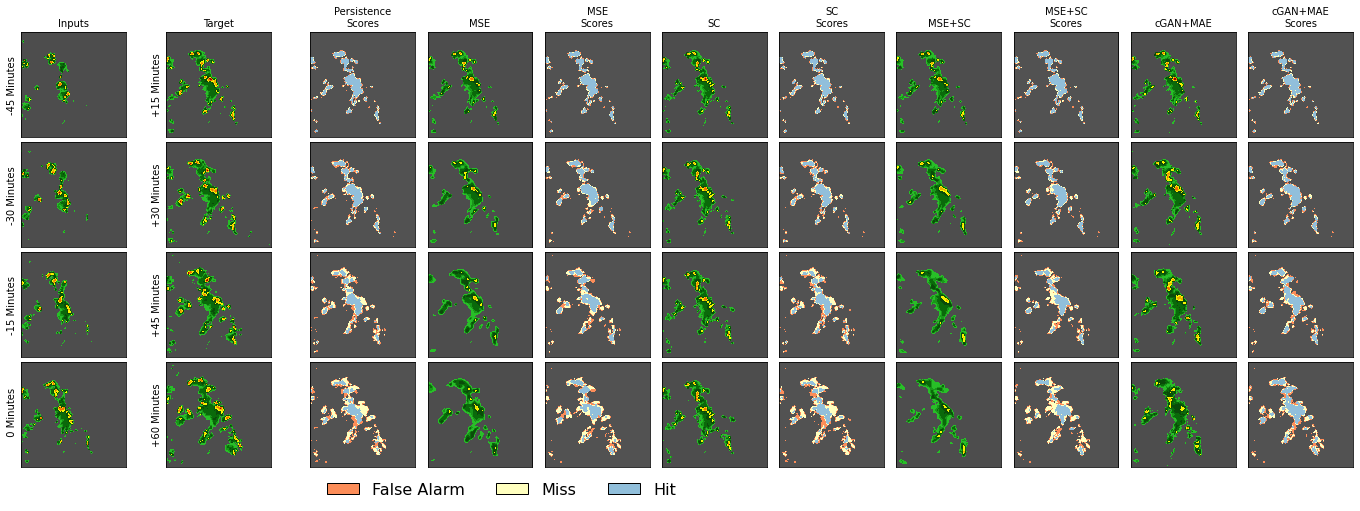

In [20]:
idx=32 # adjust this to pick a case
fig,ax = plt.subplots(4,13,figsize=(24,8), gridspec_kw={'width_ratios': [1,.2,1,.2,1,1,1,1,1,1,1,1,1]})
visualize_result([mse_model,style_model,mse_style_model,gan_model],x_test,y_test,idx,ax,labels=['MSE','SC','MSE+SC','cGAN+MAE'])